Basic Recommendation System - Using Pearson R / Correlation on Book Catalog

In [0]:
import pandas as pd

In [2]:
books = pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
users = pd.read_csv('BX-Users.csv',sep=';',error_bad_lines=False,encoding='latin-1')

In [0]:
book_ratings = pd.read_csv('BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding='latin-1')

In [15]:
#fix the column names
#books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],inplace=True,axis=1)

books.columns = ['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication',
       'Publisher']

users.columns = ['UserId', 'Location', 'Age']
book_ratings.columns = ['UserId', 'ISBN', 'BookRating']

print(books.columns)
print(users.columns)
print(book_ratings.columns)

print(books.shape)
print(users.shape)
print(book_ratings.shape)

Index(['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher'], dtype='object')
Index(['UserId', 'Location', 'Age'], dtype='object')
Index(['UserId', 'ISBN', 'BookRating'], dtype='object')
(271360, 5)
(278858, 3)
(1149780, 3)


0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: BookRating, dtype: int64


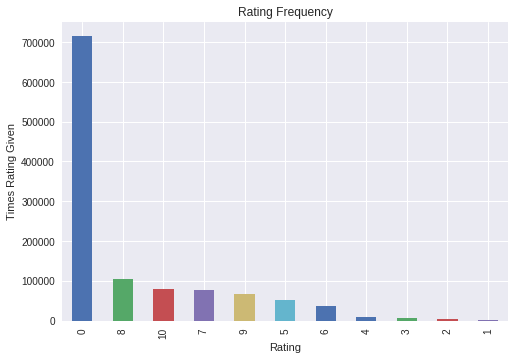

In [23]:
#plot the rating distribution
rating_count = book_ratings['BookRating'].value_counts()
fig = rating_count.plot(kind="bar")
fig.set_title("Rating Frequency")
fig.set_xlabel("Rating")
fig.set_ylabel("Times Rating Given")

print(rating_count)

Text(0, 0.5, 'Number of users')

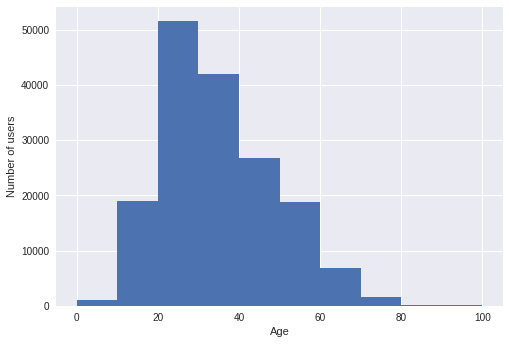

In [29]:
# age distribution of users
fig = users.Age.hist(bins=[0,10,20,30,40,50,60,70,80,90,100])
fig.set_xlabel('Age')
fig.set_ylabel('Number of users')

In [38]:
# Number of ratings received by 10 top rated books
most_rated_books = book_ratings.groupby('ISBN')['BookRating'].count()
most_rated_books.sort_values(ascending=False).head()

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
Name: BookRating, dtype: int64

In [46]:
# first lets visualize the average rating and number of ratings per book
average_ratings = pd.DataFrame(book_ratings.groupby('ISBN')['BookRating'].mean())
average_ratings['RatingCount'] = pd.DataFrame(book_ratings.groupby('ISBN')['BookRating'].count())
average_ratings.sort_values('RatingCount',ascending=False).head()

,BookRating,RatingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


# Recommendations based on correlations (Fundamental)

In [86]:
# let filter out users who provided less than 100 ratings and books that have less than 100 ratings to filter out biasness

threshold = 200

rating_counts = book_ratings['ISBN'].value_counts()
user_counts = book_ratings['UserId'].value_counts()

filtered_ratings = book_ratings[book_ratings['ISBN'].isin(rating_counts[rating_counts >= threshold].index)]
filtered_ratings = filtered_ratings[book_ratings['UserId'].isin(user_counts[user_counts >= threshold].index)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [93]:
pivot_ratings = filtered_ratings.pivot(index='UserId', columns='ISBN').BookRating
pivot_ratings.head()

ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060977493,...,0804114986,080411868X,0805063897,0842329129,0971880107,1400031354,1400034779,155874262X,1558743669,1573229326
UserId,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2977,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3363,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [94]:
# Let's see which book is related to the ISBN = 0060502258
book_t = books[books['ISBN'] == '0060502258']
book_t

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
3329,0060502258,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,HarperTorch


In [0]:
angles_ratings = pivot_ratings['0060502258']
similar_to_angles = pivot_ratings.corrwith(angles_ratings)

In [96]:
corr_angles = pd.DataFrame(similar_to_angles, columns=['pearsonR'])
corr_angles.dropna(inplace=True)
corr_summary = corr_angles.join(average_ratings['RatingCount'])
corr_summary[corr_summary['RatingCount']>=threshold].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,RatingCount
ISBN,,
0060502258,1.000000,376
080411109X,0.628968,228
0515131229,0.627359,258
0515132020,0.610018,210
0671027387,0.536573,247
038079487X,0.515970,211
0553280341,0.473678,236
0439136369,0.461282,226
0142000205,0.438005,277


In [97]:
book_similiar = books[books['ISBN'] == '080411109X']
book_similiar

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
10714,080411109X,The Hundred Secret Senses,Amy Tan,1996,Ivy Books
